# Subplotting Dataframes with Pandas and Seaborn
How to easily plot all columns of a dataframe with Pandas and Seaborn

# Introduction
Given a large dataframe, best way to explore it is to visualize it. A picture is worth a 1000 words! Pandas and Seaborn make this very easy. A common use case is to display a grid of plots where each subplot corresponds to a particular column of the dataframe. We'll call this **subplotting**.

Different use cases for **subplotting**:
1. Apply a single plotting function to each column:
  (a) use Pandas when using a Pandas built-in plotting type
  (b) use Seaborn.FacetGrid when using a custom plotting function
2. Apply multiple plotting functions to each column: 
  custom data viz using Matplotlib subplots 

Here we'll focus on use-case 1, but we'll give an example of 2 and will identify some of the limitations of the approaches presented in this talk.

TODO: SHOW A NICE TREE

** Example dataset **

We'll use the *tips* dataset from seaborn, and will only keep numeric columns.

In [3]:
import seaborn
import pandas as pd
import numpy as np
import ipywidgets

In [5]:
datasets = seaborn.get_dataset_names()

/Users/sinayoks/anaconda/envs/datacamp/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/sinayoks/anaconda/envs/datacamp/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [6]:
def get_dataset(name):
    return seaborn.load_dataset(name)\
                  .select_dtypes(include=[np.number])

# Subplotting with Pandas
## Static demo

In [ ]:
def pandas_subplots_demo(dataset_name, kind='line', figsize=(16, 5), **kwargs):
    df = get_dataset(dataset_name)
    ncol = df.shape[1]
    nrow = -1  # as many rows as necessary to plot dataframe's columns given ncol
    df.plot(subplots=True, layout=(nrow, ncol), kind=kind, figsize=figsize, **kwargs);

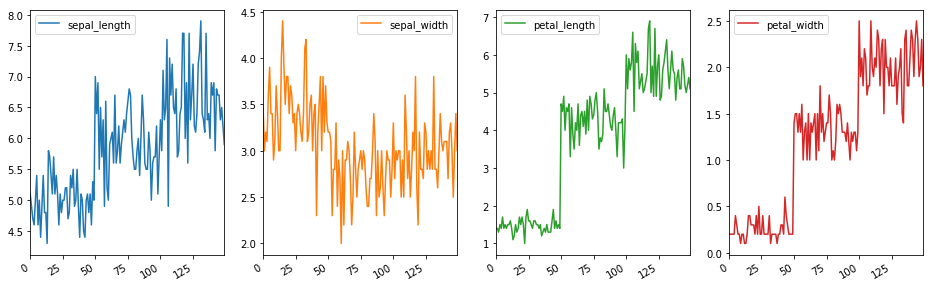

In [42]:
pandas_subplots_demo('iris', kind='line')

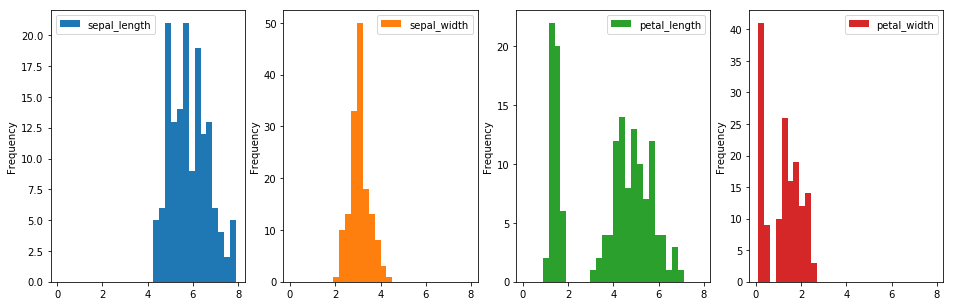

In [43]:
pandas_subplots_demo('iris', kind='hist', bins=30)

## Interactive demo

In [66]:
class InteractiveSubplots:
    
    def __init__(self):
        self.kind = ipywidgets.Dropdown(options=['line', 'hist', 'box', 'density', 'area'], index=1, description='kind')
        self.bins = ipywidgets.IntSlider(min=10, max=100, step=5, value=10, description='bins')
        self.dataset_widget = ipywidgets.widgets.Dropdown(options=datasets, index=0, description='dataset')
        self.ncol_widget = ipywidgets.widgets.IntSlider(min=1, max=5, value=2, description='ncols') 
        self.capture = ipywidgets.Output()

    def display_bins_widget_if_histogram(self, *args):
        """For histograms (kind='hist') we want to display the `bins` widget."""
        if self.kind.value == 'hist':
            self.bins.layout.visibility = 'visible'
        else:
            self.bins.layout.visibility = 'hidden'

        
    def pandas_subplot(self, dataset='tips', ncols=2, kind='line', bins=bins):
        """Subplot numeric columns of a dataset using Pandas with subplots=True"""
        df = get_dataset(dataset)
        # update the max number of columns
        self.ncol_widget.max = df.shape[-1]
        if kind == 'hist':
            kwargs = {'bins': bins}
        else:
            kwargs = {}
        df.plot(subplots=True, layout=(-1, ncols), figsize=(16, 5), kind=kind, **kwargs)
        self.capture.clear_output()
        with self.capture:
            display(df.head(5))
            
    def run(self):
        layout = ipywidgets.Layout(justify_content='space-around', display='flex', height='200px')        
        left = ipywidgets.widgets.VBox([self.dataset_widget, self.kind, self.ncol_widget, self.bins], 
                                       layout=ipywidgets.Layout(top='50px'))
        right = ipywidgets.widgets.VBox([self.capture], layout=layout)
        ui = ipywidgets.widgets.HBox([left, right], layout=layout)
        
        out = ipywidgets.interactive_output(self.pandas_subplot, {
            'dataset': self.dataset_widget, 'ncols': self.ncol_widget,
            'kind': self.kind, 'bins': self.bins
        })
        self.kind.observe(self.display_bins_widget_if_histogram, 'value')    
        return display(ui, out)

In [67]:
demo = InteractiveSubplots()
demo.run()


HBox(children=(VBox(children=(Dropdown(description='dataset', options=('anscombe', 'attention', 'brain_networks', 'car_crashes', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'planets', 'tips', 'titanic'), value='anscombe'), Dropdown(description='kind', index=1, options=('line', 'hist', 'box', 'density', 'area'), value='hist'), IntSlider(value=2, description='ncols', max=2, min=1), IntSlider(value=10, description='bins', min=10, step=5)), layout=Layout(top='50px')), VBox(children=(Output(),), layout=Layout(display='flex', height='200px', justify_content='space-around'))), layout=Layout(display='flex', height='200px', justify_content='space-around'))

Output()

In [19]:
from ipywidgets import widgets
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

HBox(children=(IntSlider(value=0), IntSlider(value=0), IntSlider(value=0)))

Output()